In [1]:
#Libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import bartlett
from statsmodels.stats.stattools import durbin_watson
import warnings
from sklearn.linear_model import Lasso
from sklearn.ensemble import  RandomForestRegressor
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
np.set_printoptions(formatter={'float_kind':'{:4f}'.format})

In [3]:
df= pd.read_csv("/work/marketing_campaign.csv")


In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
#Filling Null values with Median for Income
df['Income']=df['Income'].fillna(df['Income'].median())

To test there is significant difference in amount spent on wine for different levels of the categorical variables i.e. Education and Marital Status, we will use Box Plot and ANOVA

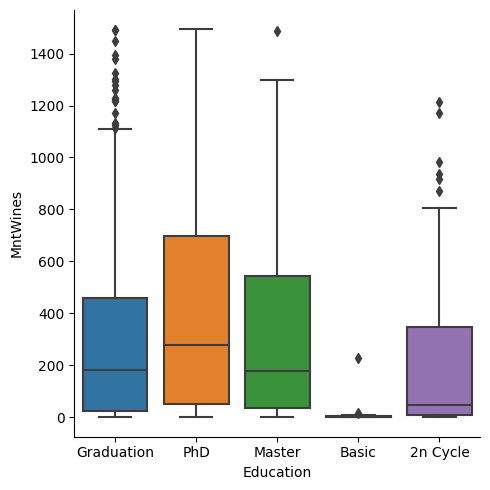

In [7]:
#Education
sns.catplot(x="Education", y="MntWines",  kind="box", data=df)

From the above boxplot, it can be seen that there is a significant difference between Amount Spend on Wine for different Education Qualifications. To confirm this, we perform ANOVA

In [8]:
ms_frame = pd.DataFrame({"Education":df['Education'],"mntwines":df['MntWines']})
groups = ms_frame.groupby("Education").groups

# Extract individual groups
Graduation = df['MntWines'][groups["Graduation"]]
PhD = df['MntWines'][groups["PhD"]]
Masters= df['MntWines'][groups["Master"]]
Basic = df['MntWines'][groups["Basic"]]
Cycle_2n = df['MntWines'][groups["2n Cycle"]]

# Perform the ANOVA
stats.f_oneway(Graduation, PhD, Masters,Basic, Cycle_2n )

F_onewayResult(statistic=29.41964999666423, pvalue=7.104155194866556e-24)

Here, p value < 0.05, implying there is significant difference in amount spent on wines between atleast one pair of education qualification.

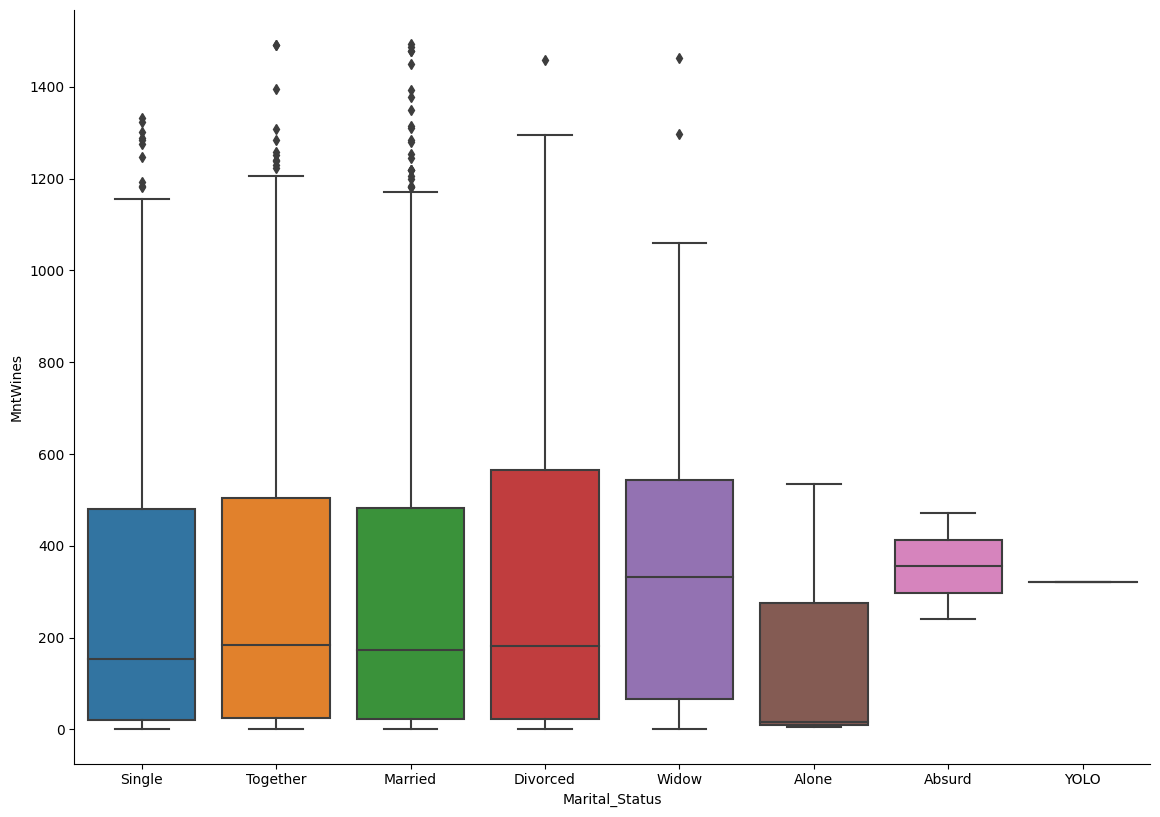

In [9]:
#Marital Status
sns.catplot(x="Marital_Status", y="MntWines",  kind="box", data=df, height=8.27, aspect=11.7/8.27)

From the above boxplot, there may not be a significant difference between Amount Spend on Wine for different marital status. We use ANOVA to confirm if there is any significant difference between the groups.

In [10]:
ms_frame = pd.DataFrame({"marital_status":df['Marital_Status'],"mntwines":df['MntWines']})
groups = ms_frame.groupby("marital_status").groups

# Extract individual groups
Single = df['MntWines'][groups["Single"]]
Together = df['MntWines'][groups["Together"]]
Married = df['MntWines'][groups["Married"]]
Divorced = df['MntWines'][groups["Divorced"]]
Widow = df['MntWines'][groups["Widow"]]
Alone = df['MntWines'][groups["Alone"]]

# Perform the ANOVA
stats.f_oneway(Single, Married, Together, Divorced, Widow, Alone)

F_onewayResult(statistic=1.0781675087057543, pvalue=0.3703887981155513)

Here, p value > 0.05, implying there is no significant difference in amount spent on wines based on categories of Marital Status.

In [11]:
#New variable Dt_Customer that holds the number of days
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])
dates = []
for i in df["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    delta = delta.days
    days.append(delta)
df["Customer_For"] = days
df["Customer_For"] = pd.to_numeric(df["Customer_For"], errors="coerce")

The newest customer's enrolment date in therecords: 2014-12-06
The oldest customer's enrolment date in the records: 2012-01-08


In [12]:
df=df.drop(columns=['Z_CostContact','Z_Revenue','ID'])
df = df.drop(columns=["Dt_Customer"])

                     Year_Birth    Income   Kidhome  Teenhome   Recency  \
Year_Birth             1.000000 -0.160899  0.230176 -0.352111 -0.019871   
Income                -0.160899  1.000000 -0.425326  0.018965 -0.004061   
Kidhome                0.230176 -0.425326  1.000000 -0.036133  0.008827   
Teenhome              -0.352111  0.018965 -0.036133  1.000000  0.016198   
Recency               -0.019871 -0.004061  0.008827  0.016198  1.000000   
MntWines              -0.157773  0.576903 -0.496297  0.004846  0.016064   
MntFruits             -0.017917  0.428791 -0.372581 -0.176764 -0.004306   
MntMeatProducts       -0.030872  0.577805 -0.437129 -0.261160  0.023056   
MntFishProducts       -0.041625  0.437564 -0.387644 -0.204187  0.001079   
MntSweetProducts      -0.018133  0.436131 -0.370673 -0.162475  0.022670   
MntGoldProds          -0.061818  0.321938 -0.349595 -0.021725  0.016693   
NumDealsPurchases     -0.060846 -0.082315  0.221798  0.387741 -0.001098   
NumWebPurchases       -0.

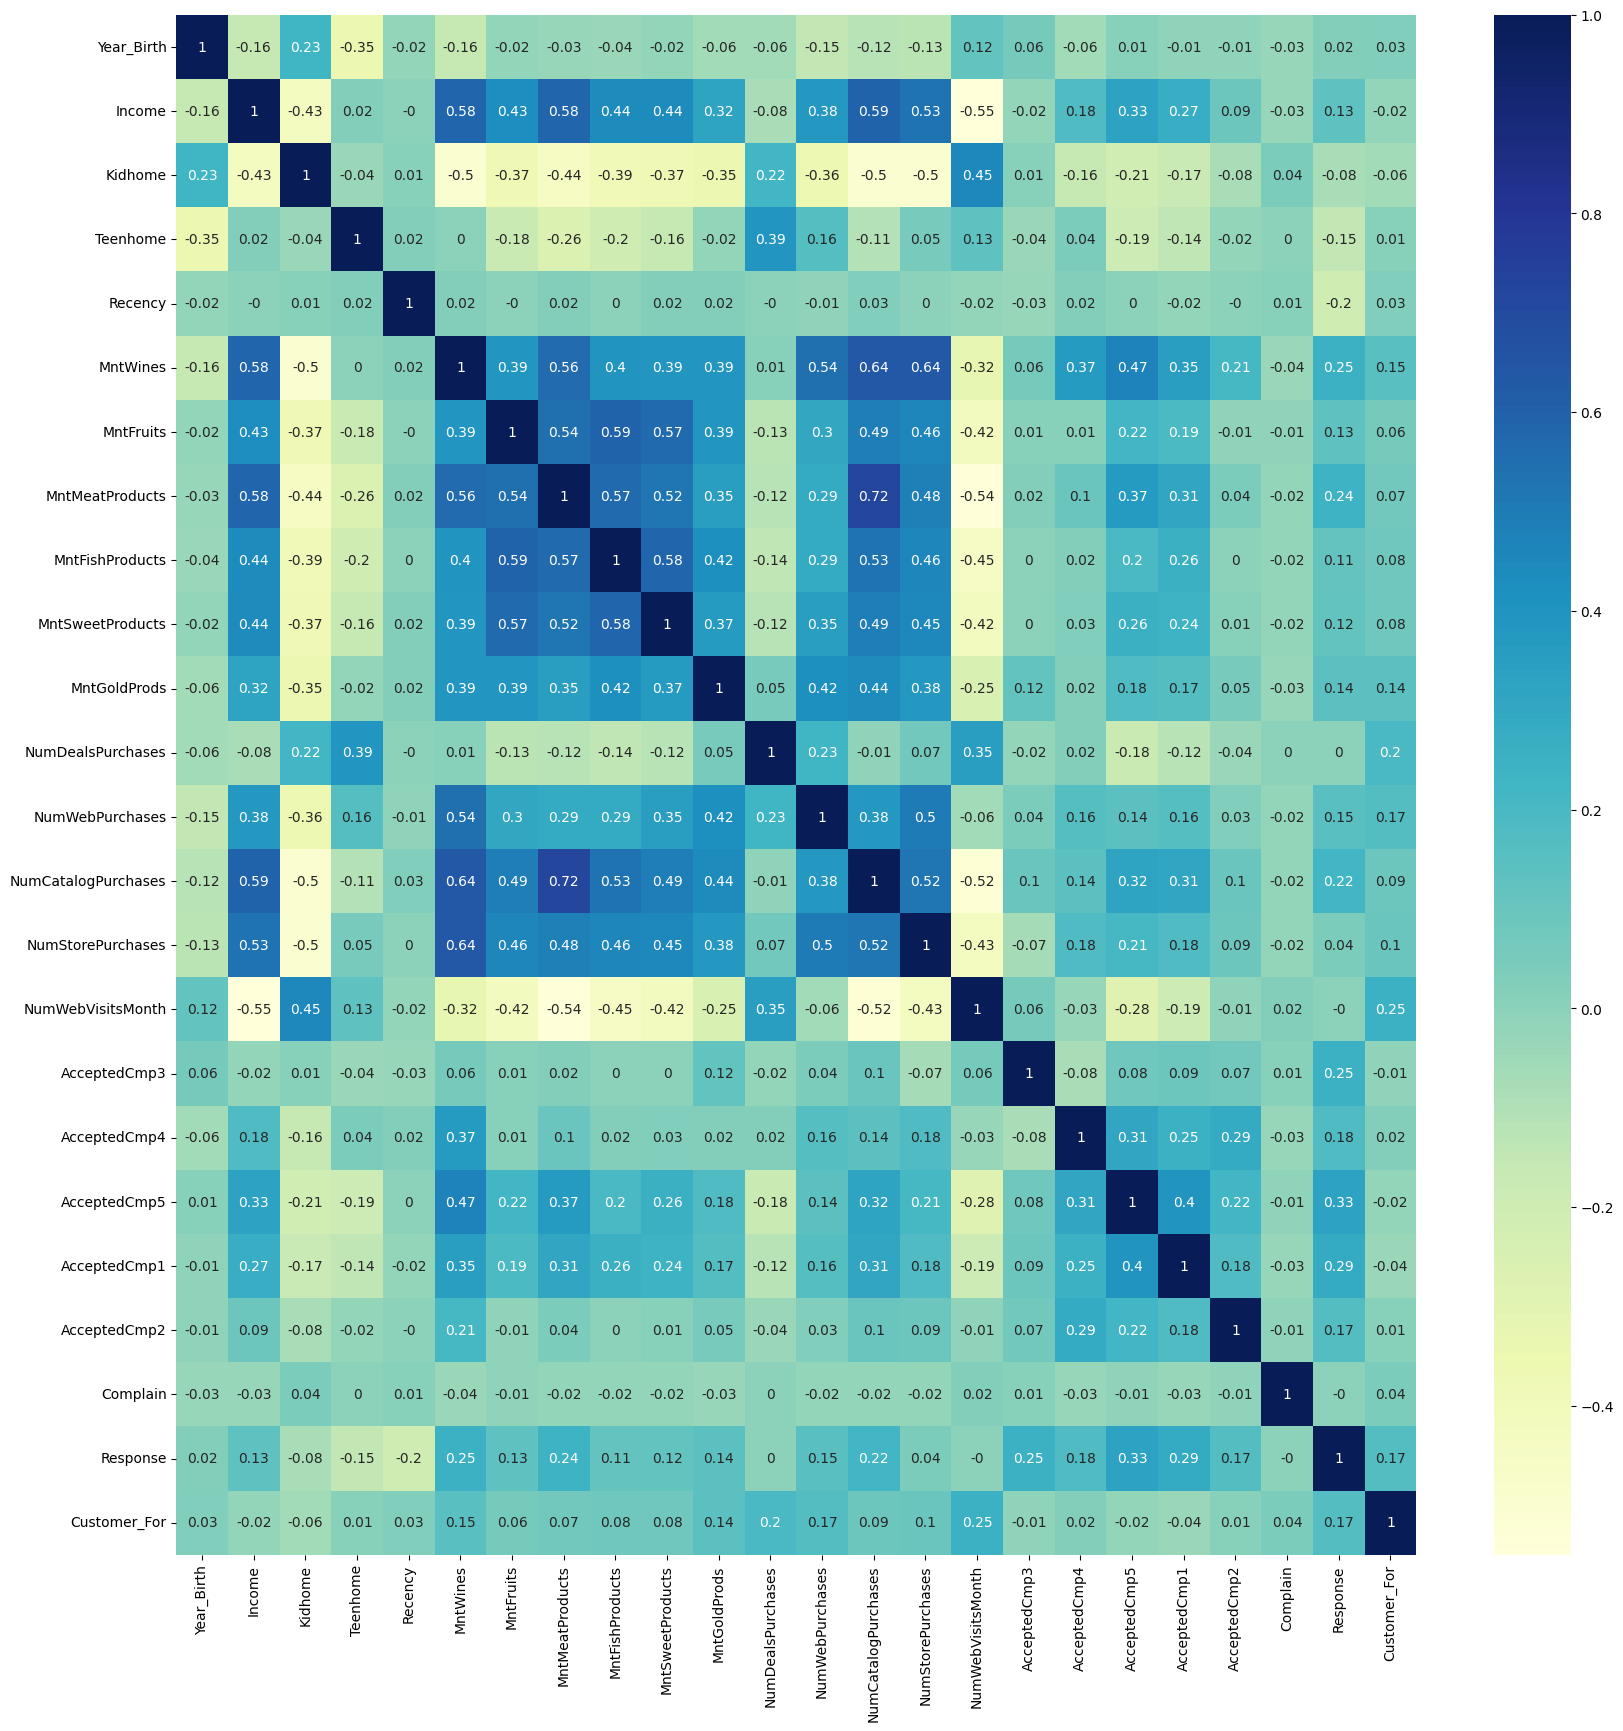

In [13]:
print(df.corr())
  
# plotting correlation heatmap
fig, ax = plt.subplots(figsize=(20,20)) 
dataplot = sns.heatmap(round(df.corr(),2), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

Problem Statement: Given a particular customer, how much will the customer spend on wine.

In [14]:
#Creating a copy of the dataframe
df_copy = df

In [15]:
#Defining X
X = df_copy.drop('MntWines', axis = 1)

In [16]:
Y = df_copy['MntWines']

In [17]:
#To extract all columns that are categorical i.e. of data type object
categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(X)

#To extract all columns that are numerical
numeric_features_selector = selector(dtype_include=("int64","float64"))
numeric_features = numeric_features_selector(X)

In [18]:
#Defining two separate pipelines for actions to be taken for categorical variables and one for numerical variables
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(drop='first'))])
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())])

In [19]:
#Defining preprocessor combining both numerical and categorical pipelies
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_columns),
])

#Defining the pipeline for regression
clf = Pipeline(steps=[("preprocessor", preprocessor), 
                      ("method", LinearRegression())])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state = 0)
clf.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Year_Birth', 'Income',
                                                   'Kidhome', 'Teenhome',
                                                   'Recency', 'MntFruits',
                                                   'MntMeatProducts',
                                                   'MntFishProducts',
                                                   'MntSweetProducts',
                                                   'MntGoldProds',
                                                   'NumDealsPurchases',
                                                   'NumWebPurchases',
                                                   'NumCatalogPurchases',
                                                   'NumStorePurchases',
                                                   'NumWebVisitsMonth',
                                                   'AcceptedCmp3',
                                                   'AcceptedCmp4',
                                                   'AcceptedCmp5',
                                                   'AcceptedCmp1',
                                                   'AcceptedCmp2', 'Complain',
                                                   'Response',
                                                   'Customer_For']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Education',
                                                   'Marital_Status'])])),
                ('method', LinearRegression())])

In [20]:

import plotly.express as px
fig = px.scatter(df, x='Income', y='MntWines', trendline='ols',
                 title='Total purchases by Income')
fig.show()




In [21]:
#Training accuracy
clf.score(X_train, Y_train)

0.7300823838248818

In [22]:
#Testing Accuracy
clf.score(X_test, Y_test) 

0.6723073941978641

In [23]:
clf['method'].coef_

array([-9.589921, 30.762337, -17.394043, 9.327750, 0.428695, 4.612946,
       28.431647, -0.138899, -9.803166, 12.422777, -13.925660, 51.493402,
       83.235144, 93.144020, 43.541961, 8.004476, 60.538872, 66.891502,
       14.185647, 16.161570, -2.413237, -4.423548, 17.374987, 18.852803,
       29.857387, 82.767344, 125.742084, 258.609784, 245.151628,
       209.049002, 209.715628, 215.229441, 187.964544, 136.952904])

Now, we check the coefficients that are significant for our model using statsmodels library to get p values 

In [24]:
OHE = ce.OneHotEncoder(cols=['Education','Marital_Status'],use_cat_names=True)
X_train_1 = OHE.fit_transform(X_train)
X_train_1 = X_train_1.drop(columns=['Education_Graduation','Marital_Status_Together'])

In [25]:
scaler = StandardScaler()
scaled = scaler.fit_transform(X_train_1)

lists = (X_train_1.columns.values.tolist())
lists.insert(0,'const')

X2 = sm.add_constant(scaled)
est = sm.OLS(Y_train, X2)
est2 = est.fit()
print(est2.summary(xname = lists))

                            OLS Regression Results                            
Dep. Variable:               MntWines   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     130.9
Date:                Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                        04:00:23   Log-Likelihood:                -11058.
No. Observations:                1680   AIC:                         2.219e+04
Df Residuals:                    1645   BIC:                         2.238e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

So, significant parameters are: Education, Income, KidHome, MntMeatProducts, MntGoldProducts, NumDealsPurchased, NumWebPurchases, NumCatalogPurchases, NumSTorePurchases, NumWebVisitsMonth, Campaigns, Customer_For

In [26]:
#Dropping insignificant explanatory variables, 
X_train_2 = X_train_1.drop(columns=['Year_Birth', 'Marital_Status_Divorced',
        'Marital_Status_Married', 'Marital_Status_Single','Marital_Status_Widow', 
        'Marital_Status_Absurd', 'Marital_Status_Alone', 'Marital_Status_YOLO', 'Recency','MntFruits', 
        'MntFishProducts', 'MntSweetProducts','Complain','Response','AcceptedCmp3'])

In [27]:
#Performing linear regression after dropping insignificant explanatory variables
scaled2 = scaler.fit_transform(X_train_2)
lists2 = (X_train_2.columns.values.tolist())
lists2.insert(0,'const')

X3 = sm.add_constant(scaled2)
est3 = sm.OLS(Y_train, X3)
est4 = est3.fit()
print(est4.summary(xname = lists2))

                            OLS Regression Results                            
Dep. Variable:               MntWines   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     232.3
Date:                Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                        04:00:23   Log-Likelihood:                -11069.
No. Observations:                1680   AIC:                         2.218e+04
Df Residuals:                    1660   BIC:                         2.229e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 307.3470    

Since dropping insignificant variables does not improve the model accuracy, we check for outliers in our data.

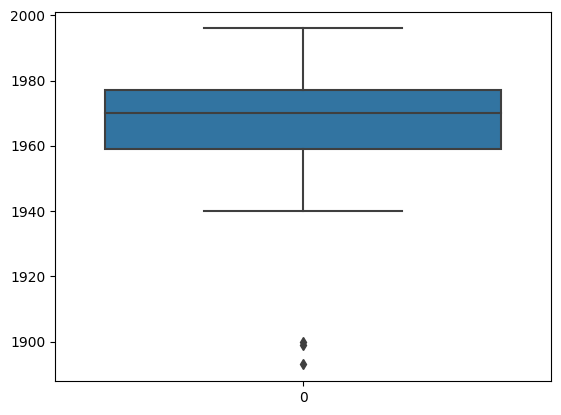

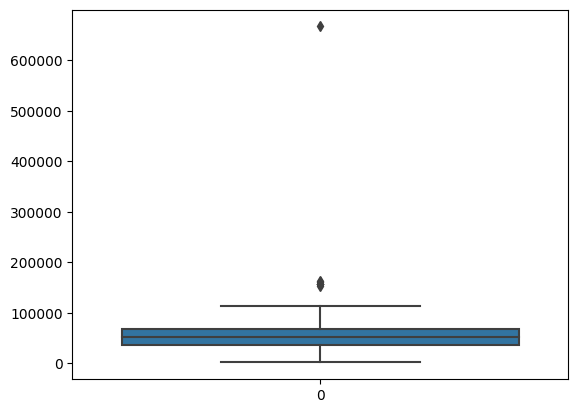

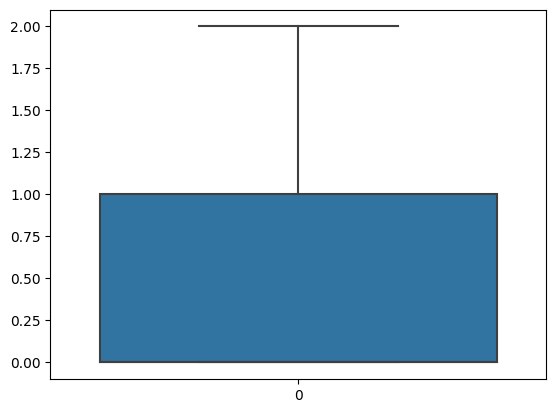

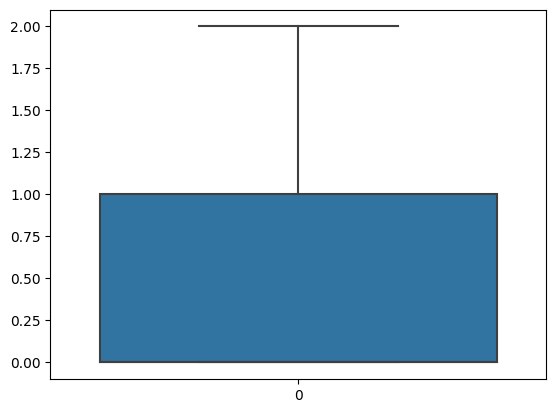

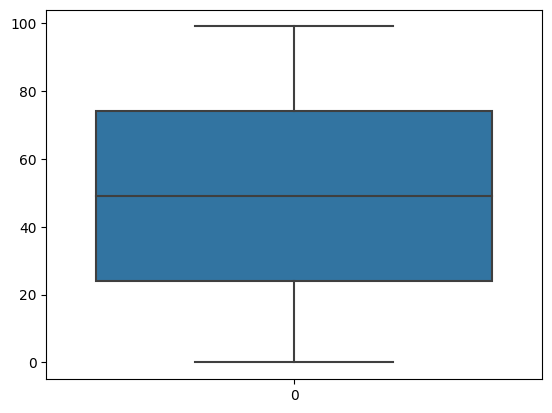

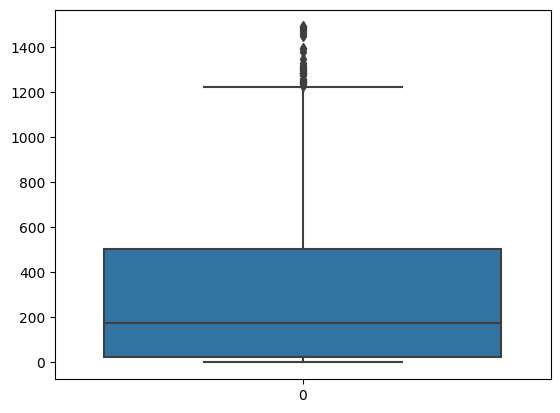

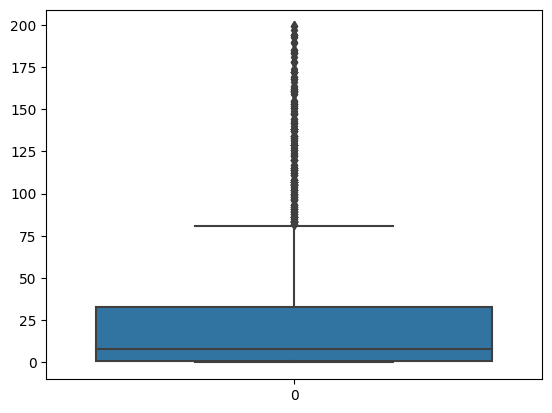

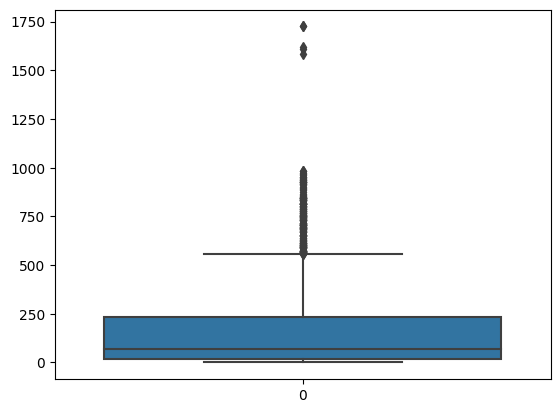

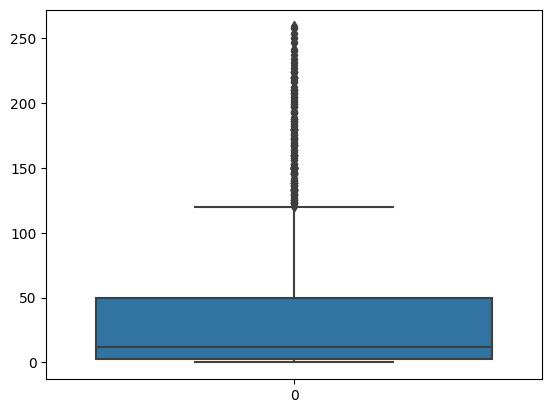

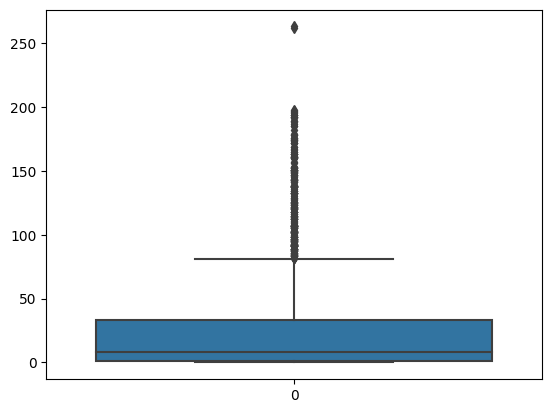

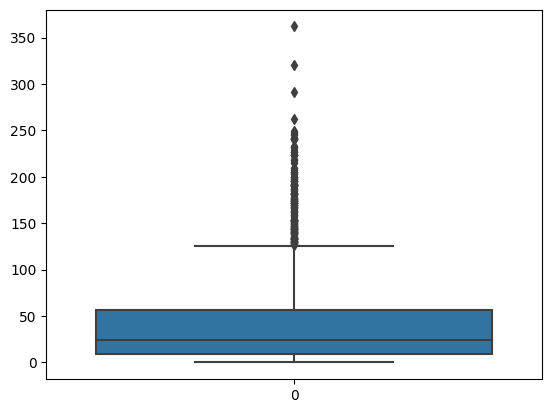

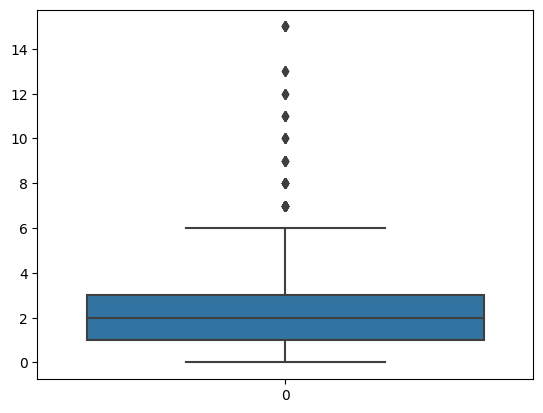

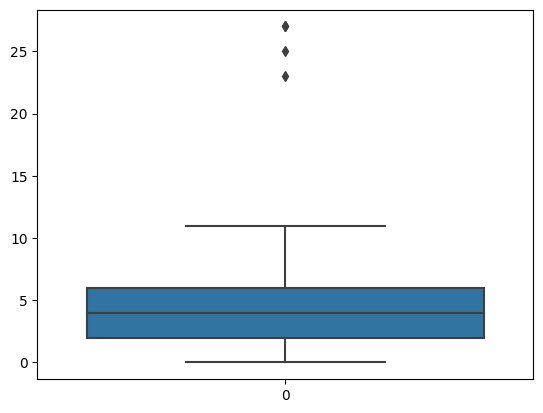

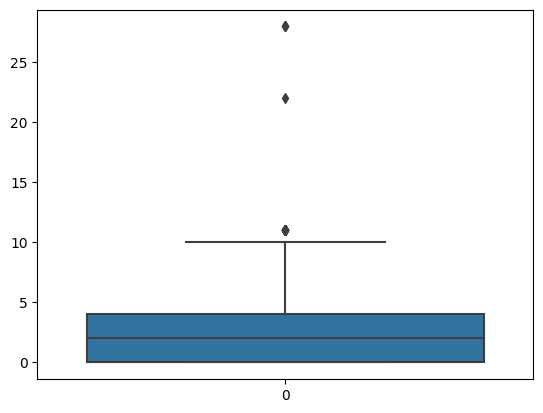

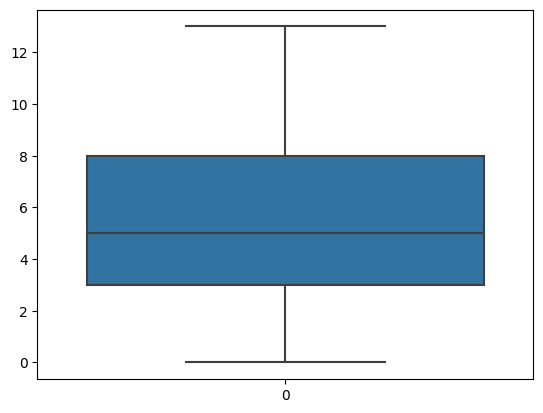

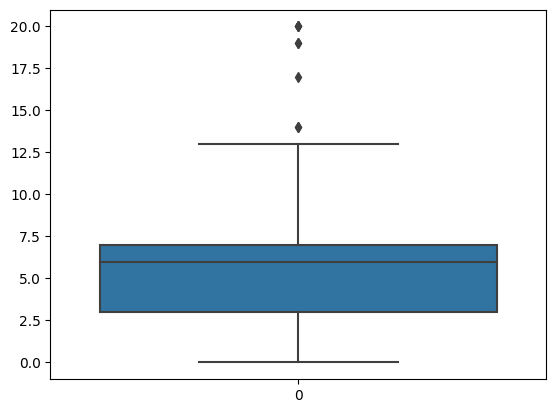

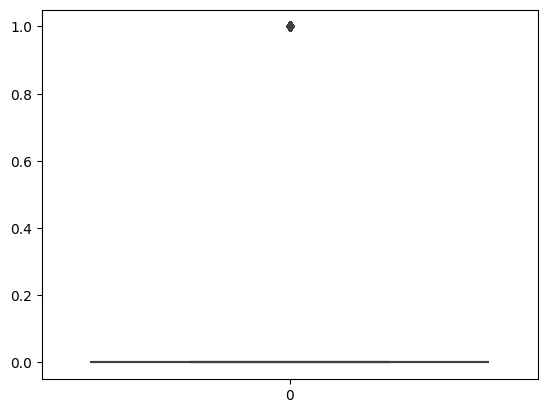

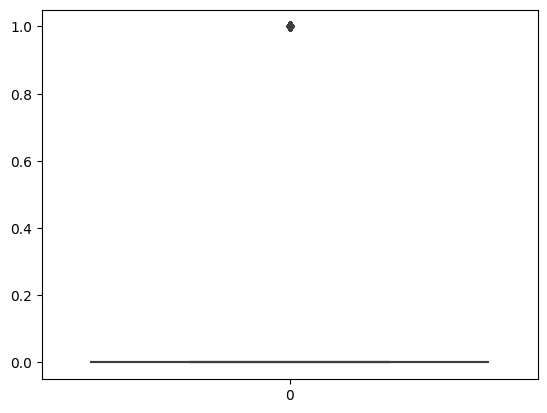

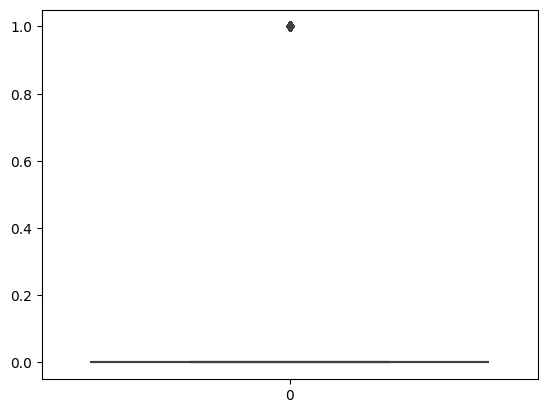

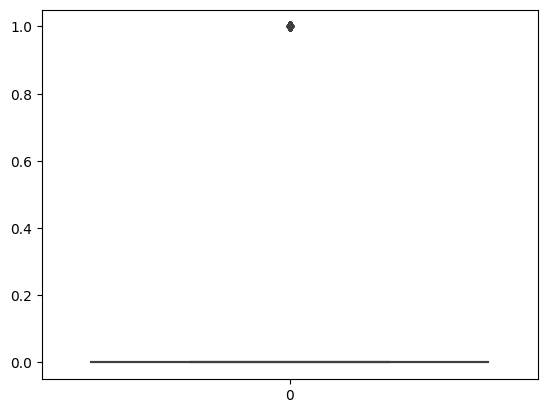

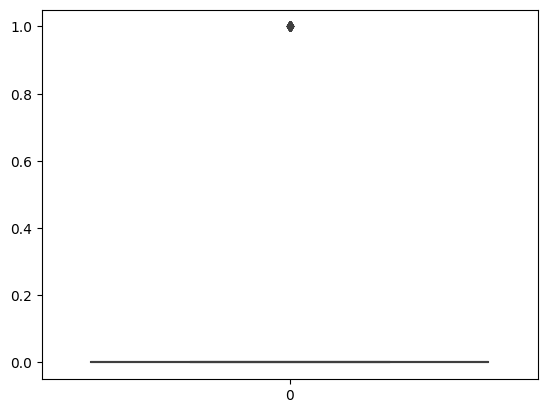

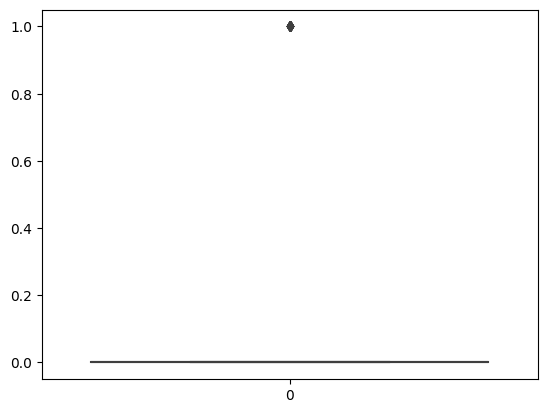

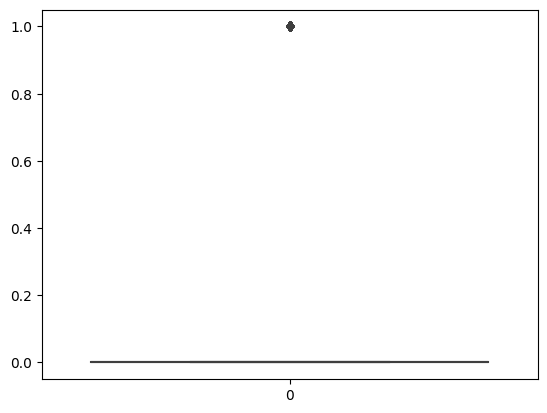

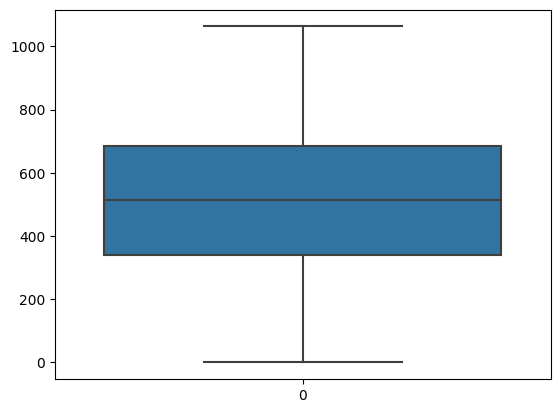

In [28]:
#Box Plot to check for Skewness to check direction of outliers and see what measure of central tendancy to replace in the missing values
df_data= df.select_dtypes(include=np.number)
for i in df_data:
    sns.boxplot(df_data[i])
    plt.show();

In [29]:
df_copy2 = df #Creating another copy
#Columns that contain outliers:
column_names = ['Year_Birth', 'Income', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','NumDealsPurchases', 
    'NumWebPurchases', 'NumCatalogPurchases', 'NumWebVisitsMonth']

#Flooring to deal with outliers in X
for column in column_names:
    X[column] = np.where(X[column] < X[column].quantile(0.10), X[column].quantile(0.10) ,X[column])
    X[column] = np.where(X[column] > X[column].quantile(0.90), X[column].quantile(0.90) ,X[column])

In [30]:
#Flooring Y Variable
Y = pd.DataFrame(Y)
Y.columns=['MntWines']
Y['MntWines'] = np.where(Y['MntWines'] < Y['MntWines'].quantile(0.10), Y['MntWines'].quantile(0.10) ,Y['MntWines'])
Y['MntWines'] = np.where(Y['MntWines'] > Y['MntWines'].quantile(0.90), Y['MntWines'].quantile(0.90) ,Y['MntWines'])

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state = 0)
X_trainC = X_train.copy()
X_testC = X_test.copy()
Y_trainC = Y_train.copy()
Y_testC = Y_test.copy()

In [32]:
#Performing regression again with all variables after having dealt with outliers
OHE = ce.OneHotEncoder(cols=['Education','Marital_Status'],use_cat_names=True)
X_trainC = OHE.fit_transform(X_trainC)
X_trainC = X_trainC.drop(columns=['Education_Graduation','Marital_Status_Together'])

scaled = scaler.fit_transform(X_trainC)
lists = (X_trainC.columns.values.tolist())
lists.insert(0,'const')

X2 = sm.add_constant(scaled)
est = sm.OLS(Y_trainC, X2)
est2 = est.fit()
print(est2.summary(xname = lists))

                            OLS Regression Results                            
Dep. Variable:               MntWines   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     191.8
Date:                Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                        04:00:28   Log-Likelihood:                -10535.
No. Observations:                1680   AIC:                         2.114e+04
Df Residuals:                    1645   BIC:                         2.133e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [33]:
X_trainC

,Year_Birth,Education_PhD,Education_Master,Education_2n Cycle,Education_Basic,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Widow,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_YOLO,Income,Kidhome,Teenhome,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For
2125,1972.0,0,0,0,0,0,0,0,0,0,0,0,79800.3,0,0,98,15.0,414.0,99.0,30.0,76.0,1.0,5.0,6.0,12,2.0,0,1,1,0,1,0,0,605
227,1952.0,0,0,0,0,1,0,0,0,0,0,0,51537.0,0,1,27,20.0,204.0,0.0,0.0,92.0,3.0,2.0,2.0,11,8.0,0,0,0,0,0,0,0,815
1751,1974.0,0,0,0,0,0,1,0,0,0,0,0,44989.0,0,1,26,0.0,106.0,49.0,10.0,106.0,5.0,5.0,1.0,5,6.0,0,0,0,0,0,0,0,727
958,1973.0,0,0,0,0,0,1,0,0,0,0,0,59041.0,1,1,25,2.0,15.0,2.0,2.0,6.0,2.0,2.0,0.0,4,5.0,0,0,0,0,0,0,0,154
526,1958.0,1,0,0,0,0,0,0,0,0,0,0,77863.0,0,0,20,38.0,319.0,16.0,25.0,12.0,1.0,4.0,5.0,10,2.0,0,0,0,0,0,0,0,374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,1977.0,0,0,1,0,0,1,0,0,0,0,0,31056.0,1,0,99,10.0,13.0,3.0,8.0,16.0,1.0,1.0,0.0,3,8.0,0,0,0,0,0,0,0,683
1731,1959.0,0,0,0,0,0,1,0,0,0,0,0,24219.5,0,0,77,1.0,7.0,23.0,4.0,19.0,1.0,1.0,1.0,2,8.0,0,0,0,0,0,0,0,708
763,1978.0,1,0,0,0,0,0,1,0,0,0,0,31626.0,1,0,12,1.0,9.0,2.0,1.0,34.0,1.0,2.0,1.0,2,7.0,1,0,0,0,0,0,1,427
835,1956.0,0,0,0,0,0,1,0,0,0,0,0,71391.0,0,1,50,83.0,274.0,46.0,89.0,122.0,5.0,6.0,5.0,12,3.0,0,0,0,0,0,0,0,617


In [34]:
#Dropping insignificant variables
X_train_copy2 = X_trainC.drop(columns=['Year_Birth', 'Marital_Status_Divorced',
        'Marital_Status_Married', 'Marital_Status_Single','Marital_Status_Widow', 
        'Marital_Status_Absurd', 'Marital_Status_Alone', 'Marital_Status_YOLO','Recency','MntFruits','Complain','Response',
                                            'MntGoldProds' , 'NumDealsPurchases','Teenhome','AcceptedCmp3','AcceptedCmp2','AcceptedCmp1'])

In [35]:
scaled2 = scaler.fit_transform(X_train_copy2)
lists2 = (X_train_copy2.columns.values.tolist())
lists2.insert(0,'const')

X3 = sm.add_constant(scaled2)
est3 = sm.OLS(Y_trainC, X3)
est4 = est3.fit()
print(est4.summary(xname = lists2))

                            OLS Regression Results                            
Dep. Variable:               MntWines   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     404.9
Date:                Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                        04:00:28   Log-Likelihood:                -10546.
No. Observations:                1680   AIC:                         2.113e+04
Df Residuals:                    1663   BIC:                         2.122e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 285.0545    

So, flooring outliers improves our model accuracy from 0.727 to 0.796

In [36]:
#Again traing our model with new information using new features
numeric_features1 = numeric_features.copy()
list_to_remove=['Year_Birth', 'Marital_Status_Together', 'Marital_Status_Divorced','Marital_Status_Married', 'Marital_Status_Single','Marital_Status_Widow', 
        'Marital_Status_Absurd', 'Marital_Status_Alone', 'Marital_Status_YOLO','Year_Birth',
       'Teenhome', 'Recency', 'MntFruits', 'MntGoldProds',
       'NumDealsPurchases', 'AcceptedCmp3', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response','Education_2n Cycle','Education_Master','Education_PhD','Education_Basic','Education_Graduation']

numeric_features1 = list(set(numeric_features1) - set(list_to_remove))

In [37]:
categorical_columns1 = categorical_columns.copy()
categorical_columns1.remove("Marital_Status")

In [38]:
numeric_features1

['MntFishProducts',
 'MntSweetProducts',
 'AcceptedCmp4',
 'NumCatalogPurchases',
 'AcceptedCmp5',
 'Customer_For',
 'NumWebVisitsMonth',
 'MntMeatProducts',
 'NumWebPurchases',
 'Kidhome',
 'Income',
 'NumStorePurchases']

In [39]:
preprocessor2 = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features1),
        ("cat", categorical_transformer, categorical_columns1),
    ]
)
clf2 = Pipeline(
    steps=[("preprocessor", preprocessor2), ("method", LinearRegression())]
)

In [41]:
#Training accuracy
clf2.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MntFishProducts',
                                                   'MntSweetProducts',
                                                   'AcceptedCmp4',
                                                   'NumCatalogPurchases',
                                                   'AcceptedCmp5',
                                                   'Customer_For',
                                                   'NumWebVisitsMonth',
                                                   'MntMeatProducts',
                                                   'NumWebPurchases', 'Kidhome',
                                                   'Income',
                                                   'NumStorePurchases']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Education'])])),
                ('method', LinearRegression())])

In [42]:
#Training accuracy
clf2.score(X_test, Y_test)

0.7617149461507686

------------------------------------

Checking the assumptions for linear regression

Normality of Residuals
Shapiro–Wilk test W test
cutoff limit montecarlo method

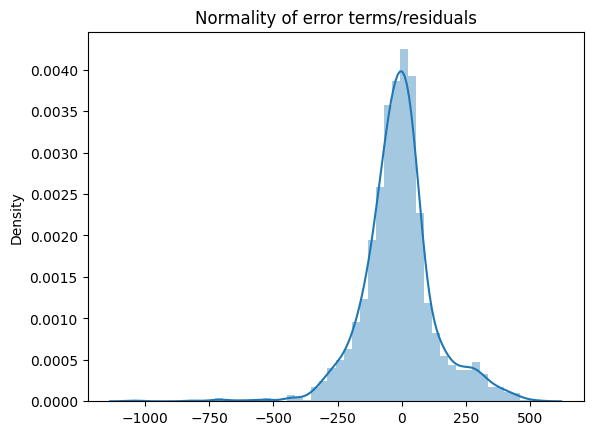

In [43]:
Y_pred = np.array(clf.predict(X_train)).flatten()
residuals = (np.array(Y_train).flatten()) - (np.array(Y_pred).flatten())
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

-----------------------------

HOMOSCEDASTICITY

Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms.

 to transform the dependent variable using one of the variance stabilizing transformations log


Weighted Least Squares (WLS): WLS is a technique that can be used to correct for heteroskedasticity by assigning different weights to the observations based on their variances.

Transforming the dependent variable: Transforming the dependent variable, such as taking the log or square root, can help stabilize the variance and reduce heteroskedasticity.

Regression with robust standard errors: This method uses a different estimator for the standard errors that is robust to heteroskedasticity, such as White's estimator.

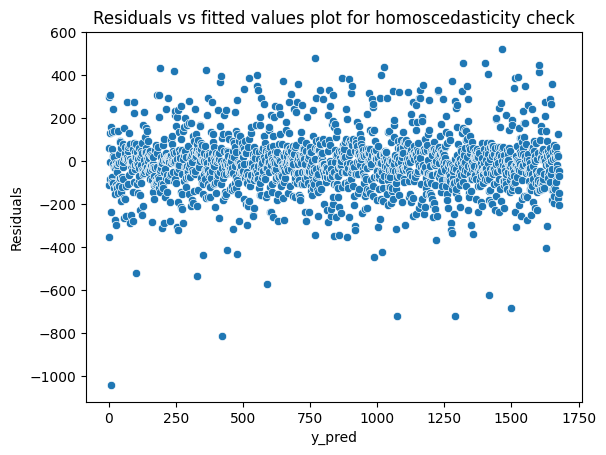

In [51]:
p = sns.scatterplot(residuals.flatten())
plt.xlabel('y_pred')
plt.ylabel('Residuals')
#plt.ylim(-10,10)
#plt.xlim(0,26)
#p = sns.lineplot([0,26],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [52]:
#Bartlett Test To confirm presence of heteroscedasticity
test = bartlett(np.array(X_train_copy2).flatten(),residuals)
print(test)

BartlettResult(statistic=13562.168698368894, pvalue=0.0)


Since p value is less than 0.05 in Bartlett, it's null hypothesis that error terms are homoscedastic gets rejected.

park white goldn-quandt



----------------------

AUTOCORRELATION Autocorrelation refers to the degree of correlation between the values of the same variables across different observations in the data.  

sometimes known as serial correlation in the discrete time case, is the correlation of a signal with a delayed copy of itself as a function of delay
urbin-Watson tests produces a test statistic that ranges from 0 to 4. 
utocorrelation can cause problems in conventional analyses (such as ordinary least squares regression) that assume independence of observations.

RUN test for Randonness  
mean and varience 


Differencing: Taking the difference between consecutive observations can help remove autocorrelation.

Removing the trend: If there is a trend in the data, removing it can also help reduce autocorrelation.

Using a transformation: Applying a transformation, such as a log or square root, can help stabilize the variance and reduce autocorrelation.

Using a model: Autoregressive (AR) and moving average (MA) models can be used to account for autocorrelation in the data.

Using ARIMA and SARIMA model: Autoregressive Integrated Moving Average (ARIMA) and Seasonal Autoregressive Integrated Moving Average (SARIMA) models are commonly used to model time series data and account for autocorrelation.

In [53]:
#perform Durbin-Watson test
durbin_watson(residuals)

2.0067266392768057

Since, value is close to 2, we would consider autocorrelation not to be a problem

---------------------------------

MULTICOLLINEARITY- 

variance inflation factor (VIF) is a measure of the amount of multicollinearity in regression analysis. Multicollinearity exists when there is a correlation between multiple independent variables in a multiple regression model.
 when two or more independent variables are closely related or measure almost the same thing, then the underlying effect that they measure is being accounted for twice (or more) across the variables.
 While multicollinearity does not reduce a model's overall predictive power, it can produce estimates of the regression coefficients that are not statistically significant.
 
 
 Variance inflation factors allow a quick measure of how much a variable is contributing to the standard error in the regression
 
VIF equal to 1 = variables are not correlated
VIF between 1 and 5 = variables are moderately correlated 
VIF greater than 5 = variables are highly correlated

high r^2 less sign t score

Removing one or more of the correlated variables: Identifying the correlated variables and removing one or more of them can help reduce multicollinearity.

Combining correlated variables: If the correlated variables measure the same underlying construct, they can be combined into a single composite variable.

Regularization techniques: Ridge and Lasso regression are techniques that can help to reduce multicollinearity by shrinking the regression coefficients of correlated variables towards zero

In [54]:
#Using VIF Values
X_variables = X_train[numeric_features1]
vif_data = pd.DataFrame()
vif_data["feature"] = X_variables.columns
vif_data["VIF"] = [variance_inflation_factor(X_variables.values, i) for i in range(len(X_variables.columns))]
vif_data

,feature,VIF
0,MntFishProducts,4.016960
1,MntSweetProducts,3.697833
2,AcceptedCmp4,1.290182
3,NumCatalogPurchases,7.629958
4,AcceptedCmp5,1.415925
5,Customer_For,7.338911
6,NumWebVisitsMonth,11.401797
7,MntMeatProducts,6.604489
8,NumWebPurchases,7.618903
9,Kidhome,2.761175


Lasso and Ridge regression are two types of regularization techniques used in multiple regression analysis to address the problem of overfitting.

    Lasso (Least Absolute Shrinkage and Selection Operator) regression: Lasso regression is a technique that can be used to perform both variable selection and regularization. It adds a penalty term to the least squares objective function, where the penalty term is the absolute value of the coefficients multiplied by a scalar lambda (λ). The Lasso penalty has the effect of shrinking the regression coefficients towards zero, effectively reducing the number of variables in the model.

    Ridge regression: Ridge regression is another technique that can be used to address overfitting. It also adds a penalty term to the least squares objective function, but the penalty term is the square of the coefficients multiplied by a scalar lambda (λ). The Ridge penalty has the effect of shrinking the regression coefficients towards zero, but unlike Lasso, it does not set any coefficients to zero.

In general, Lasso is more suited when we have a large number of variables and many of them are irrelevant, while Ridge is more suited when we have a small number of correlated variables.

Both Lasso and Ridge are called shrinkage methods, because they shrink the regression coefficients towards zero, which can help to reduce the variance in the predictions and improve the interpretability of the model.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=00ac7532-385f-47c0-8db8-9e0d45b5b9a9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>